# Phase 3 Project

<img src="./images/diabetes.webp" style="width:500px;height:300px;">

# Introduction

Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Other factors such as gender, age, and bmi can also be contributors to the disease. This project will be focused in building models that can help predict whether a patient has the disease or not. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

## Problem Statement

The head of medical Board has tasked me to create a predictive model that can predict whether a patient has diabetes or not.

To answer the question, I will build a classifier to predict whether patients have cancer with the given dataset.This will be based on several diagnostic measurements, including glucose level, blood pressure, smoking history, gender, BMI, and age. I will train models such as logistic regression, K Nearest Neighbours, decision trees and ensemble methods such as random forests and evaluate which model performs better.

## Objectives
My top objectives for modelling will be:

1. Determine important factors that affect diabetes.
2. Determine the best model to predict diabetes.

### Metric of Success

My project will be successful if I can create a model that predicts breast cancer with an accuracy of 85% or above.

### Data sources
The data for this modelling was obtained from kaggle.

The dataset can be found by clicking the following link: <a href="https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset" 
           target="_blank">Diabetes Dataset
        </a>

## Data Understanding

In this section I will try to understand the dataset before getting into any analysis.

This will involve understanding the shape of the dataset, the columns present and what they represent, the datatypes of the columns and any missing values.

In [1]:
# importing all the packages I will use

import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

# modelling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

I load in the data first and check the first 5 rows

In [2]:
# reading the dataset
df = pd.read_csv("./Data/diabetes.csv")
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


From the head we can see that most of the features are numeric.

Gender and smoking history can be seen as categorical.

In [3]:
# check for the shape of the dataset
df.shape

(100000, 9)

The dataset has 9 columns of features and 100,000 rows

In [4]:
# check information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


From the information we have 9 columns and 100,000 rows.

Gender and smoking history columns are of object datatype.

Age, bmi and HbA1c_level columns are of float datatype.

Hypertension, heart disease, blood glucose level and diabetes columns are of int datatype.

The diabetes column will be used as the target while the other columns will be the predictors.

In [5]:
# check for duplicates
df.duplicated().sum()

3854

We have 3854 duplicates in our dataset. These will be dropped during data cleaning.

In [6]:
# description about the dataset
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


This creates a brief statistical description of our dataset.

We can see that the mean age in our dataset is 41 years and our mean for bmi(body mass index) is 27.

In [7]:
# check for any missing values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

We have no missing values in our dataset.

In [8]:
# create a copy of the dataset for further analysis keeping the original intact

diabetes_df = df.copy()
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Data Cleaning
This is where I work on the dataset to ensure it is goof for use in modelling.

In [9]:
# drops the duplicates in the data
diabetes_df = diabetes_df.drop_duplicates()
diabetes_df.shape

(96146, 9)

In [10]:
# check for distinct values

for col in diabetes_df.columns:
    distinct_vals = len(diabetes_df[col].unique())
    print(f"{col}: {distinct_vals} unique values")

gender: 3 unique values
age: 102 unique values
hypertension: 2 unique values
heart_disease: 2 unique values
smoking_history: 6 unique values
bmi: 4247 unique values
HbA1c_level: 18 unique values
blood_glucose_level: 18 unique values
diabetes: 2 unique values


In [11]:
# check value counts for gender
diabetes_df['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [12]:
# normalize the counts
diabetes_df['gender'].value_counts(normalize=True)

Female    0.584122
Male      0.415691
Other     0.000187
Name: gender, dtype: float64

From that we can see that female and male have more values while other only has 18 values which is 0.000187%. We will remove that 'other' category to only have female and male.

In [13]:
# Drop the 'Other' category
diabetes_df = diabetes_df[diabetes_df['gender'].isin(['Female', 'Male'])]

# Verify the value counts to confirm
print(diabetes_df['gender'].value_counts())

Female    56161
Male      39967
Name: gender, dtype: int64


In [14]:
diabetes_df['smoking_history'].value_counts()

never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: smoking_history, dtype: int64

In [15]:
# check the columns
diabetes_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

## Exploratory Data Analysis

In [16]:
# create a function for plotting a histogram
def plot_hist(df, col):
    fig, ax = plt.subplots(figsize=(8,7))
    sns.histplot(data=df, x=col, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(f"{col}")
    plt.ylabel("Count");

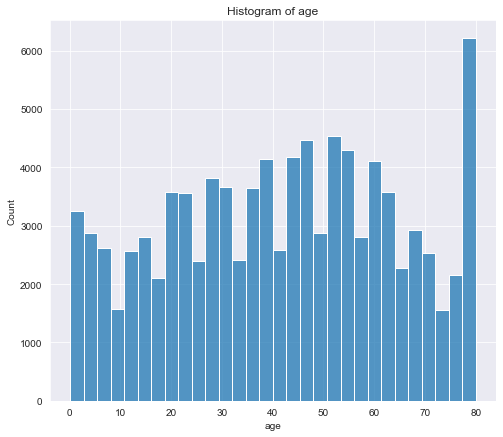

In [17]:
# check distribution of age
plot_hist(diabetes_df, "age")

We can see that the highest age is 80 and more ages are distributed between 20 to around 65 years

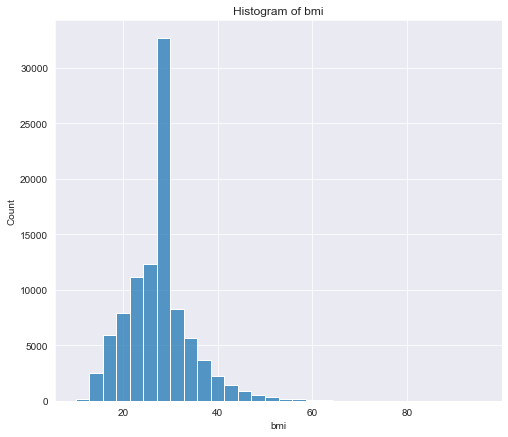

In [18]:
plot_hist(diabetes_df, "bmi")

We can see a spike of bmi around 30.

In [19]:
# create a function to plot countplots
def count_plot(df, col):
    fig, ax = plt.subplots(figsize=(8,6))
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution');

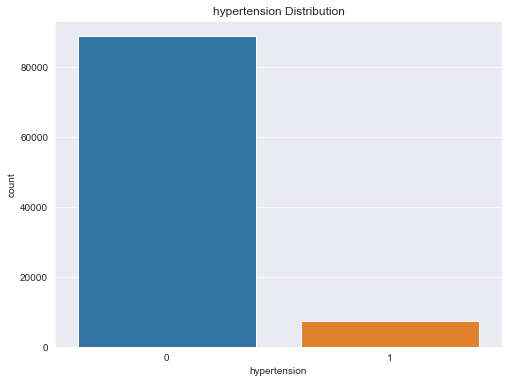

In [20]:
count_plot(diabetes_df, "hypertension")

We can see that people with no hypetension are more than those with no hypertension.

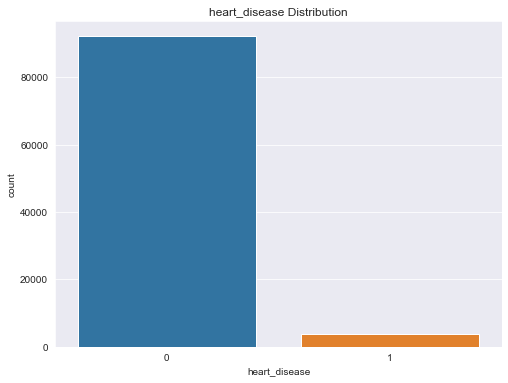

In [21]:
count_plot(diabetes_df, "heart_disease")

People with no heart disease are more than those with heart disease.

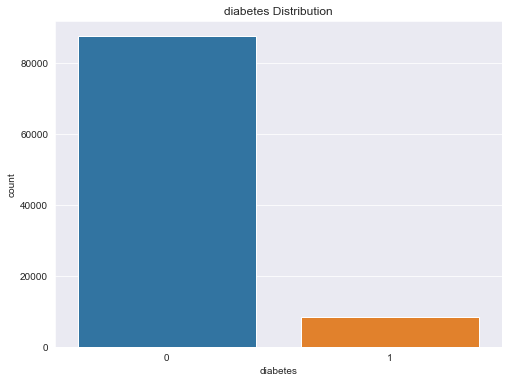

In [22]:
count_plot(diabetes_df, "diabetes")

People withh no diabetes are more than those with diabetes. This is the target and we can see that the distribution of patients with diabetes are less. This can be attributed to people not having hypertension or heart disease as they are some causes of diabetes from domain knowledge.

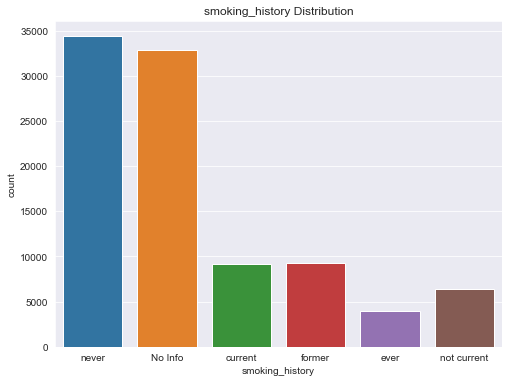

In [23]:
count_plot(diabetes_df, "smoking_history")

In [24]:
# create a function for box plots vs diabetes
def box_plot(df, col):
    fig, ax = plt.subplots(figsize=(8,7))
    sns.boxplot(x='diabetes', y=col, data=df)
    plt.title(f"{col} vs diabetes");

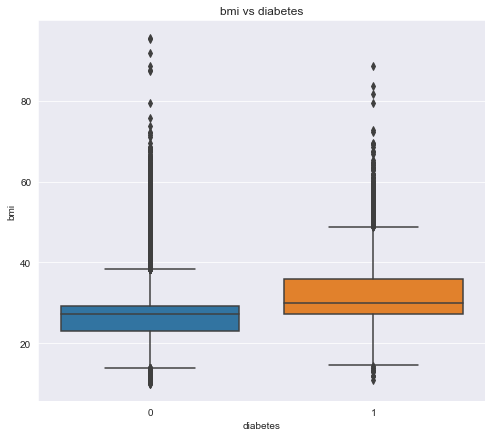

In [25]:
box_plot(diabetes_df, "bmi")

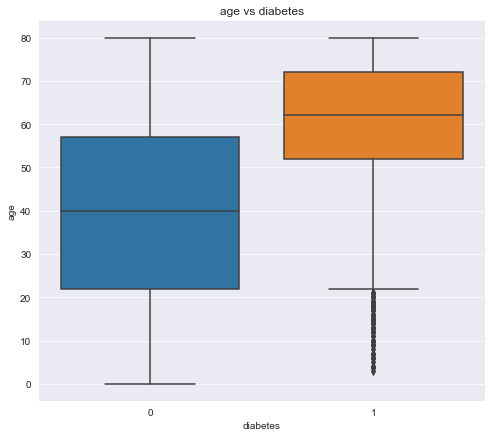

In [26]:
box_plot(diabetes_df, "age")

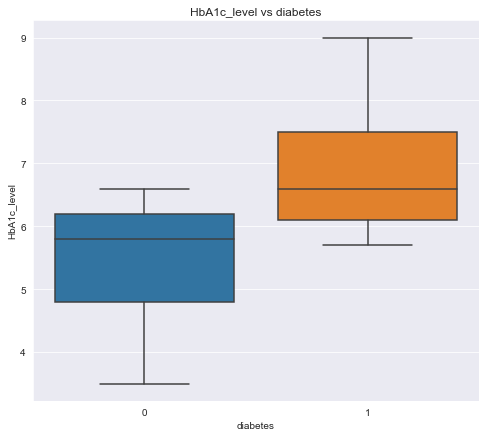

In [27]:
box_plot(diabetes_df, "HbA1c_level")

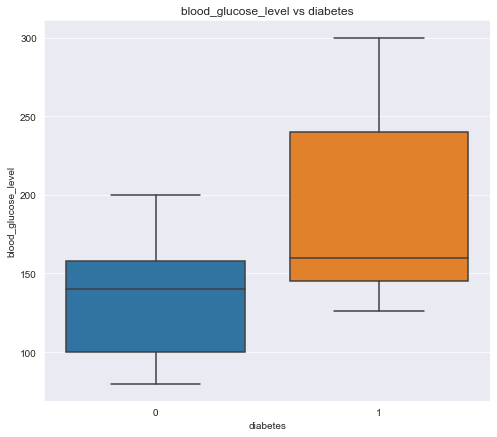

In [28]:
box_plot(diabetes_df, "blood_glucose_level")

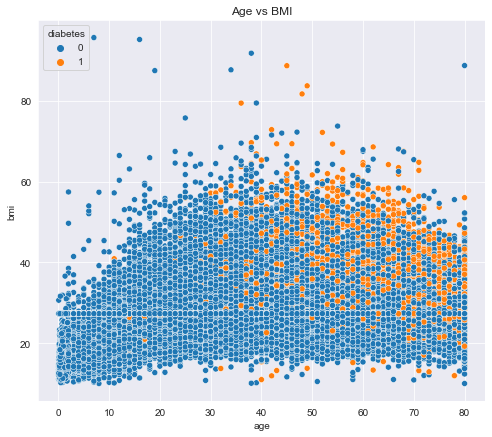

In [29]:
# create scatterplot of Age vs BMI colored by Diabetes
fig, ax = plt.subplots(figsize=(8,7))
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI');

We can see from the scatter plot that most people above 40 have hypertension

In [30]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

# Apply the function to the 'smoking_history' column
diabetes_df['smoking_history'] = diabetes_df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(diabetes_df['smoking_history'].value_counts())

non-smoker     67276
past_smoker    19655
current         9197
Name: smoking_history, dtype: int64


In [31]:
# check for correlation
diabetes_df.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.257297,0.238449,0.344779,0.106708,0.114323,0.264918
hypertension,0.257297,1.000000,0.119972,0.148124,0.081443,0.084841,0.195696
heart_disease,0.238449,0.119972,1.000000,0.061382,0.068142,0.070838,0.170701
bmi,0.344779,0.148124,0.061382,1.000000,0.084443,0.092593,0.214951
HbA1c_level,0.106708,0.081443,0.068142,0.084443,1.000000,0.171717,0.406446
blood_glucose_level,0.114323,0.084841,0.070838,0.092593,0.171717,1.000000,0.424366
diabetes,0.264918,0.195696,0.170701,0.214951,0.406446,0.424366,1.000000


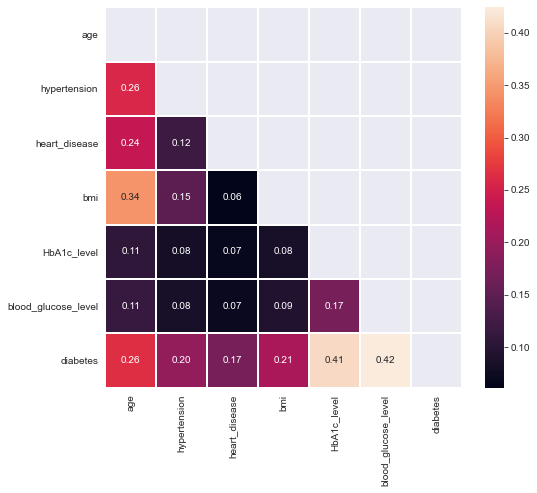

In [32]:
# heatmap of the correlations
fig, ax = plt.subplots(figsize=(8,7))
corr=diabetes_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt = ".2f");

We can see from the above that there is no multicollinearity between the predictors

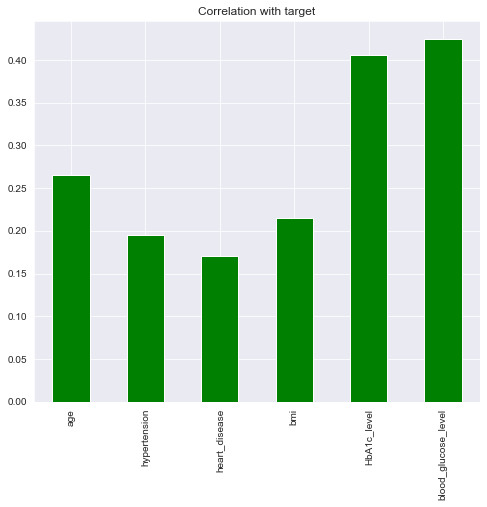

In [33]:
# correlations with target
diabetes_df.drop('diabetes', axis=1).corrwith(diabetes_df["diabetes"]).plot(kind='bar', grid=True, figsize=(8, 7), title="Correlation with target",color="green");

We can see that blood glucose level and HbA1c level have a slightly higher correlation with the target.

## Data preprocessing

In this section I will prepare the data for modelling. This will involve encoding categorical variables and also scaling the features.

In [34]:
# we first split the data into X and y
X = diabetes_df.drop("diabetes", axis=1)
y = diabetes_df["diabetes"]

# split the data using a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# check the shape of the split data
len(X_train), len(X_test), len(y_train), len(y_test)

(67289, 28839, 67289, 28839)

Splitting the data int train and test sets will help prevent leakage during preproceessing.

The test set will eventually be used to evaluate how the model performs.

In [35]:
# check the categorical variables to encode
# we saw we have 2 categorical variables, gender and smoking history

print(diabetes_df['gender'].value_counts())
print(".......")
print(diabetes_df['smoking_history'].value_counts())

Female    56161
Male      39967
Name: gender, dtype: int64
.......
non-smoker     67276
past_smoker    19655
current         9197
Name: smoking_history, dtype: int64


We can see we have 2 categories in gender and 3 categories in smoking history. We use ordinal encoder to encode for gender and onehot encoder for smoking history.

In [36]:
gender_train = X_train[["gender"]]

# (2) Instantiate an OrdinalEncoder
encoder_gender = OrdinalEncoder()

# (3) Fit the encoder on age_train
encoder_gender.fit(gender_train)

# Inspect the categories of the fitted encoder
encoder_gender.categories_[0]

array(['Female', 'Male'], dtype=object)

In [37]:
gender_encoded_train = encoder_gender.transform(gender_train)

# Flatten for appropriate shape
gender_encoded_train = gender_encoded_train.flatten()

# Visually inspect gender_encoded_train
gender_encoded_train

array([1., 1., 0., ..., 0., 0., 1.])

In [38]:
diabetes_df['gender']

0        Female
1        Female
2          Male
3        Female
4          Male
          ...  
99994    Female
99996    Female
99997      Male
99998    Female
99999    Female
Name: gender, Length: 96128, dtype: object

In [39]:
X_train["gender"] = gender_encoded_train

# Visually inspect X_train
X_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
49226,1.0,43.0,0,0,non-smoker,27.32,6.5,100
30774,1.0,47.0,0,0,non-smoker,24.90,6.6,85
92991,0.0,33.0,0,0,past_smoker,40.08,6.2,200
39196,0.0,21.0,0,0,non-smoker,29.26,6.2,160
69480,0.0,59.0,0,0,past_smoker,30.93,6.1,85
...,...,...,...,...,...,...,...,...
6284,0.0,12.0,0,0,non-smoker,20.56,6.0,160
56192,0.0,31.0,0,0,past_smoker,24.34,4.5,85
79371,0.0,69.0,0,0,non-smoker,28.71,6.0,90
860,0.0,37.0,0,0,non-smoker,24.96,6.2,158


In [40]:
smoking_train = X_train[["smoking_history"]]

# Instantiate a OneHotEncoder
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")

# (3) Fit the encoder on fireplace_qu_train
ohe.fit(smoking_train)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['current', 'non-smoker', 'past_smoker'], dtype=object)]

In [41]:
smoking_encoded_train = ohe.transform(smoking_train)

# Visually inspect smoking_encoded_train
smoking_encoded_train

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [42]:
smoking_encoded_train = pd.DataFrame(
    # Pass in NumPy array
    smoking_encoded_train,
    # Set the column names to the categories found by OHE
    columns=ohe.categories_[0],
    # Set the index to match X_train's index
    index=X_train.index
)

# Visually inspect new dataframe
smoking_encoded_train

,current,non-smoker,past_smoker
49226,0.0,1.0,0.0
30774,0.0,1.0,0.0
92991,0.0,0.0,1.0
39196,0.0,1.0,0.0
69480,0.0,0.0,1.0
...,...,...,...
6284,0.0,1.0,0.0
56192,0.0,0.0,1.0
79371,0.0,1.0,0.0
860,0.0,1.0,0.0


In [43]:
X_train.drop("smoking_history", axis=1, inplace=True)

# Visually inspect X_train
X_train

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
49226,1.0,43.0,0,0,27.32,6.5,100
30774,1.0,47.0,0,0,24.90,6.6,85
92991,0.0,33.0,0,0,40.08,6.2,200
39196,0.0,21.0,0,0,29.26,6.2,160
69480,0.0,59.0,0,0,30.93,6.1,85
...,...,...,...,...,...,...,...
6284,0.0,12.0,0,0,20.56,6.0,160
56192,0.0,31.0,0,0,24.34,4.5,85
79371,0.0,69.0,0,0,28.71,6.0,90
860,0.0,37.0,0,0,24.96,6.2,158


In [44]:
X_train = pd.concat([X_train, smoking_encoded_train], axis=1)

# Visually inspect X_train
X_train

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,current,non-smoker,past_smoker
49226,1.0,43.0,0,0,27.32,6.5,100,0.0,1.0,0.0
30774,1.0,47.0,0,0,24.90,6.6,85,0.0,1.0,0.0
92991,0.0,33.0,0,0,40.08,6.2,200,0.0,0.0,1.0
39196,0.0,21.0,0,0,29.26,6.2,160,0.0,1.0,0.0
69480,0.0,59.0,0,0,30.93,6.1,85,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
6284,0.0,12.0,0,0,20.56,6.0,160,0.0,1.0,0.0
56192,0.0,31.0,0,0,24.34,4.5,85,0.0,0.0,1.0
79371,0.0,69.0,0,0,28.71,6.0,90,0.0,1.0,0.0
860,0.0,37.0,0,0,24.96,6.2,158,0.0,1.0,0.0


In [45]:
# perform preprocessing on test set
# Encode gender type
gender_test = X_test[["gender"]]
gender_encoded_test = encoder_gender.transform(gender_test).flatten()
X_test["gender"] = gender_encoded_test


# One-hot encode smoking history
smoking_test = X_test[["smoking_history"]]
smoking_encoded_test = ohe.transform(smoking_test)
smoking_encoded_test = pd.DataFrame(
    smoking_encoded_test,
    columns=ohe.categories_[0],
    index=X_test.index
)
X_test.drop("smoking_history", axis=1, inplace=True)
X_test = pd.concat([X_test, smoking_encoded_test], axis=1)

# Visually inspect X_test
X_test

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,current,non-smoker,past_smoker
2547,0.0,5.0,0,0,15.14,4.5,90,0.0,1.0,0.0
47513,0.0,26.0,0,0,18.63,4.0,85,0.0,1.0,0.0
15486,0.0,5.0,0,0,14.64,5.0,158,0.0,1.0,0.0
92933,1.0,77.0,0,1,29.84,4.0,90,0.0,0.0,1.0
67275,1.0,23.0,0,0,21.05,6.5,130,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
81429,0.0,21.0,0,0,21.84,3.5,130,0.0,1.0,0.0
29022,0.0,42.0,0,0,27.79,4.8,158,0.0,1.0,0.0
35324,1.0,70.0,0,0,27.32,6.2,80,0.0,0.0,1.0
56258,0.0,19.0,0,0,26.81,4.8,90,0.0,1.0,0.0


### Fit a base model

A base model is fit which will help us identify if other models are performing better

In [46]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr.score(X_train, y_train)

0.9587599756275171

In [47]:
# predict for test set
test_preds = lr.predict(X_test)
accuracy = accuracy_score(y_test, test_preds)
accuracy

0.9566559173341656

In [97]:
def plot_confusion(tests, preds):
    fig, ax = plt.subplots(figsize=(8,7))
    cf = confusion_matrix(tests, preds, normalize='true')
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('Confusion Matrix');


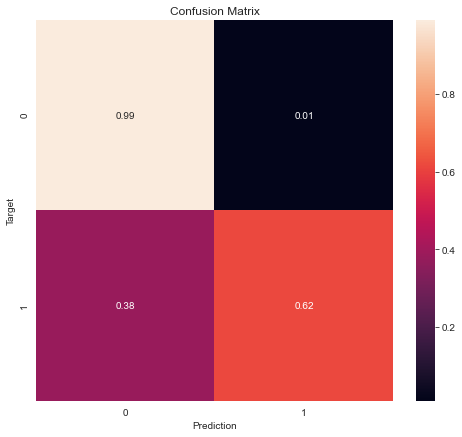

In [98]:
plot_confusion(y_test, test_preds)

Below is an image showing the components of a confusion matrix, which are:
1. True Negative
2. False Positive
3. False Negative
4. True positive

<img src="./images/confusion_matrix.png" style="width:500px;height:300px;">

In [49]:
# scale the data for both train and test sets and see if whe have an improvement in the models performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [50]:
# inspect the scaled train features
X_train

array([[ 1.18292963,  0.05505431, -0.28891442, ..., -0.32593821,
         0.6549386 , -0.5064751 ],
       [ 1.18292963,  0.23298425, -0.28891442, ..., -0.32593821,
         0.6549386 , -0.5064751 ],
       [-0.84535882, -0.38977054, -0.28891442, ..., -0.32593821,
        -1.52686068,  1.97443071],
       ...,
       [-0.84535882,  1.21159892, -0.28891442, ..., -0.32593821,
         0.6549386 , -0.5064751 ],
       [-0.84535882, -0.2118406 , -0.28891442, ..., -0.32593821,
         0.6549386 , -0.5064751 ],
       [ 1.18292963, -0.83459539, -0.28891442, ..., -0.32593821,
         0.6549386 , -0.5064751 ]])

In [51]:
X_test

array([[-0.84535882, -1.63528012, -0.28891442, ..., -0.32593821,
         0.6549386 , -0.5064751 ],
       [-0.84535882, -0.70114793, -0.28891442, ..., -0.32593821,
         0.6549386 , -0.5064751 ],
       [-0.84535882, -1.63528012, -0.28891442, ..., -0.32593821,
         0.6549386 , -0.5064751 ],
       ...,
       [ 1.18292963,  1.2560814 , -0.28891442, ..., -0.32593821,
        -1.52686068,  1.97443071],
       [-0.84535882, -1.01252533, -0.28891442, ..., -0.32593821,
         0.6549386 , -0.5064751 ],
       [-0.84535882, -0.47873551, -0.28891442, ..., -0.32593821,
         0.6549386 , -0.5064751 ]])

With our features scaled we can apply more classification algorithms and tune the models to see if we achieve a higher prediction accuracy.

In [57]:
# create a function to train and evaluate a model

def train_and_evaluate(ModelClass, **params):
    """
    Trains a model and evaluates its performance on train and test data.

    Parameters:
    - ModelClass: The class of the machine learning model (e.g., LogisticRegression).
    - params: Parameters to initialize the model.

    Returns:
    - A string reporting training and test accuracy.
    """

    model = ModelClass(**params).fit(X_train, y_train)

    # Compute train predictions and accuracy
    train_preds = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_preds)
    
    # compute test predictions and accuracy
    test_predictions = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_predictions)

    print(f"Evaluation of model:")

    return f"Train prediction accuracy: {train_acc:.2f} Test prediction accuracy: {test_acc:.2f}"


In [53]:
# Define the parameter grid
param_grid = {
        'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
        'solver': ['liblinear', 'lbfgs'],  # Solvers
        'penalty': ['l2', 'l1']  # Regularization penalty
    }
    
# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
    
# Initialize GridSearchCV
grid_search = GridSearchCV(
        estimator=log_reg, 
        param_grid=param_grid, 
         
        cv=5,  # 5-fold cross-validation
        verbose=1,
        n_jobs=-1
    )

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.0s finished


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2', 'l1'],
                         'solver': ['liblinear', 'lbfgs']},
             verbose=1)

In [54]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_params

{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}

In [55]:
best_score = grid_search.best_score_
best_score

0.9598448145125825

In [58]:
lr_tuned = train_and_evaluate(LogisticRegression, C= 0.01, penalty= 'l1', solver= 'liblinear')
lr_tuned

Evaluation of model:


'Train prediction accuracy: 0.96 Test prediction accuracy: 0.96'

### Fiting decision trees

We will fit decision trees to check whether our model improves.

In [60]:
# fit a simple dt with no tuned hyperparameters

dt = train_and_evaluate(DecisionTreeClassifier)
dt

Evaluation of model:


'Train prediction accuracy: 1.00 Test prediction accuracy: 0.95'

We get a test prediction accuracy of 95% in the test set which is less than our base model.

We can also see that the model is overfitting in the train set with prediction accuracy of 100%. We will use grid search to find the best parameters for the decision tree.

In [100]:
dtc = DecisionTreeClassifier()

parameters = {
    'criterion':['gini','entropy'],
    'max_depth':range(2,10,1),
    'min_samples_leaf':range(1,5,1),
    'min_samples_split':range(2,5,1),
    #'splitter':['best','random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   27.0s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 5)},
             verbose=1)

In [101]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [102]:
grid_search_dt.best_score_

0.9713474488011347

In [103]:
dt_tuned = train_and_evaluate(DecisionTreeClassifier, criterion = 'gini', max_depth = 8, min_samples_leaf = 1,
                              min_samples_split = 2)
dt_tuned

Evaluation of model:


'Train prediction accuracy: 0.97 Test prediction accuracy: 0.97'

We get a 97% accuracy which is an improvement from our base model.

In [104]:
# fit the decision tree manually to plot the tree
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 8, min_samples_leaf = 1,
                              min_samples_split = 2)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [105]:
dt.classes_

array([0, 1], dtype=int64)

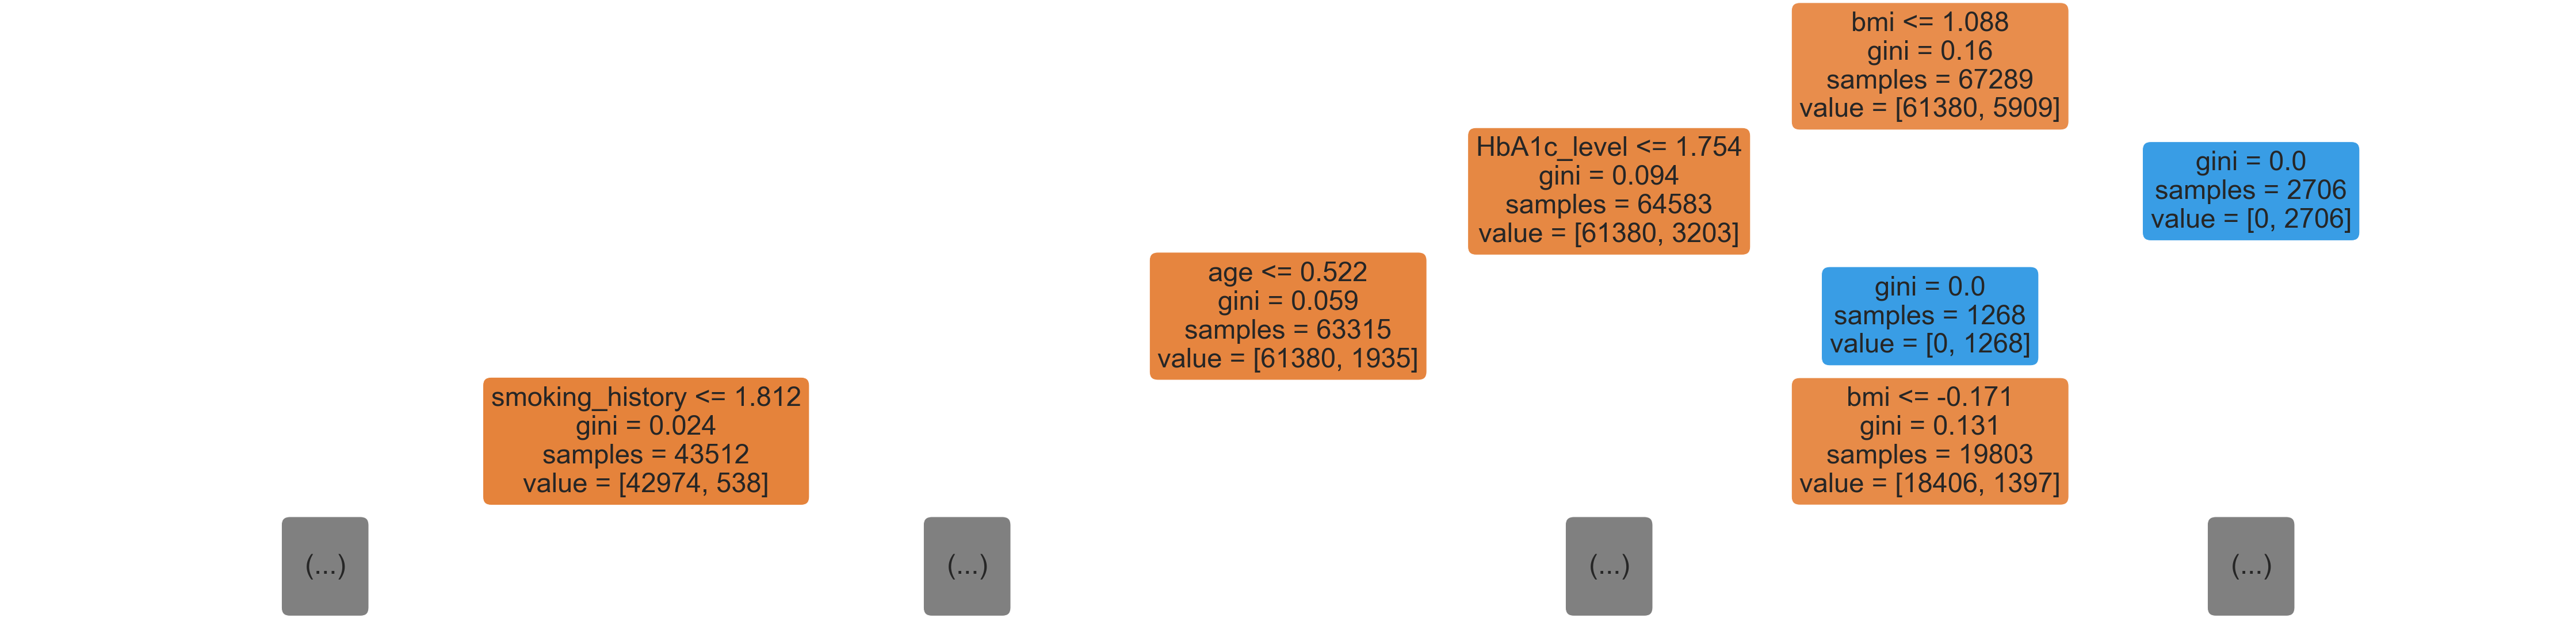

In [106]:
plt.figure(figsize=(80, 20))
plot_tree(dt, feature_names= X.columns, filled= True, rounded= True, max_depth=3);

From the tree we can clearly visualize how the splits are happening. We start with bmi as the most important factor used to split based on the gini value of 0.16.

### Advantages of decison trees over our base logistic regression model

Decision trees can handle non linear relationships which can help capture complex patterns in the data.

Decision trees provide a clear indication of which features are most important for prediction.

### Fit an ensemble model: Random forest

Random forests is an ensemble model which is based on bagging. Bagging is where multiple models are trained on different subsets of the training data. In this case with random forest, multiple decision trees are trained during the training phase. This can help reduce the risk of overfitting and improves predictions.

The random forest will help me decide whether to use the decision trees or use the random forest as my final model.

In [75]:
# fit a random forest without tuning

rf = train_and_evaluate(RandomForestClassifier)
rf


Evaluation of model:


'Train prediction accuracy: 1.00 Test prediction accuracy: 0.97'

I can see a prediction accuracy of about 97%. I will the try using hyperparameters to find the best fit.

In [77]:
rfc = RandomForestClassifier()

parameters = {
    'criterion':['gini','entropy'],
    'max_depth':range(2,10,1),
    'min_samples_leaf':range(1,5,1),
}

grid_search_rf = GridSearchCV(rfc, parameters, cv=3, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 192 out of 192 | elapsed:  1.9min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 5)},
             verbose=1)

In [78]:
grid_search_rf.best_params_

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 4}

In [79]:
grid_search_rf.best_score_

0.9712731705135078

In [85]:
rfc = train_and_evaluate(RandomForestClassifier, criterion = 'gini', max_depth = 9, min_samples_leaf = 4)
rfc

Evaluation of model:


'Train prediction accuracy: 0.97 Test prediction accuracy: 0.97'

I do not see a change in the prediction accuracy. I will go with the decision tree with tuned parameters as the best model for predicting whether a patient has diabetes or not.

In [107]:
# create a classification report of the decison tree
test_predictions = dt.predict(X_test)
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     26266
           1       0.98      0.67      0.80      2573

    accuracy                           0.97     28839
   macro avg       0.98      0.83      0.89     28839
weighted avg       0.97      0.97      0.97     28839



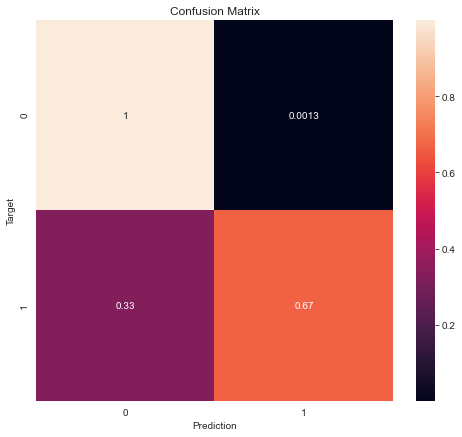

In [108]:
# plot the confusion matrix
plot_confusion(y_test, test_predictions)

Our trained decision tree model achieved an accuracy of around 97%. This indicates that the model correctly classified around 97% of all cases in the test set.

The model has a precision of (0.97) for class 0, meaning that among all instances where the model predicted non-diabetes, 97% were indeed non-diabetes. The recall for class 0 is also high (1.0). This means that our model correctly identified 100% of all actual non-diabetes cases in the dataset.

The precision for class 1 is around (0.98), which indicates that when the model predicted diabetes, it was correct around 98% of the time. However, the recall is low around (0.67). This means that our model was able to capture around 67% of all actual diabetes cases.

In [86]:
## check the most important features for the decision tree

dt.feature_importances_

array([0.        , 0.01547464, 0.00236444, 0.00610142, 0.01501003,
       0.63553207, 0.3255174 , 0.        , 0.        , 0.        ])

In [89]:
train_columns = ['gender',	'age',	'hypertension',	'heart_disease', 'bmi',	'HbA1c_level',	'blood_glucose_level', 'current', 'non-smoker',	'past_smoker']
train_columns

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'current',
 'non-smoker',
 'past_smoker']

In [92]:
importance_df = pd.DataFrame({
    'feature': train_columns,
    'importance': dt.feature_importances_
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
5,HbA1c_level,0.635532
6,blood_glucose_level,0.325517
1,age,0.015475
4,bmi,0.015010
3,heart_disease,0.006101
2,hypertension,0.002364
0,gender,0.000000
7,current,0.000000
8,non-smoker,0.000000
9,past_smoker,0.000000


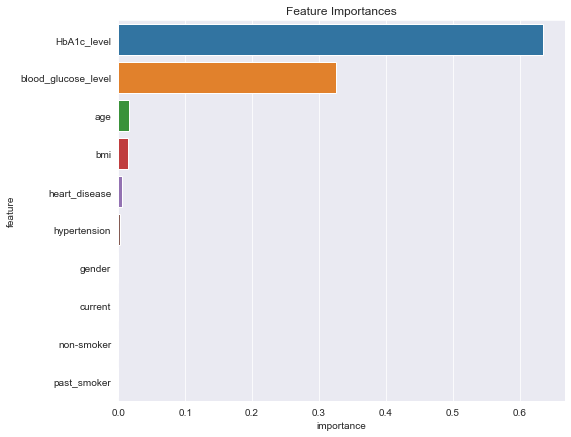

In [94]:
# Plot the feature importances
fig, ax = plt.subplots(figsize=(8, 7))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('Feature Importances');

The feature importance results provide insight into which features are most influential in predicting diabetes using our decision tree model. The importance of a feature is calculated based on how much the tree nodes that use that feature reduce impurity across all trees in the forest.

We can see that:

HbA1c_level is the most important feature with an importance of 0.63. HbA1c is a measure of the average levels of blood glucose over the past 2 to 3 months, so it is a significant predictor of diabetes.

The blood_glucose_level the second most important feature with an importance of 0.32. This aligns with medical knowledge, as blood glucose levels are directly used to diagnose diabetes.

Age the third most important feature with an importance of 0.0154. It is known that the risk of type 2 diabetes increases as you get older.

BMI is fourth at 0.015. Body Mass Index is a key risk factor for diabetes, and its role is well documented in medical literature.

Heart disease and hypertension show some slight importance too. 

Smoking history and gender show zero importance.

## Summary

The analysis employed a decision tree classifier as the best model to predict diabetes based on various health indicators and lifestyle factors. The model was trained and evaluated on a dataset of 100,000 records, and hyperparameter tuning was performed to optimize the model's performance.

The model achieved an accuracy of approximately 97%, with precision of 0.97 for class 0 (non-diabetic) and 0.98 for class 1 (diabetic). It was also able to recall 100% of non-diabetic cases and 67% of diabetic cases correctly. The relatively high accuracy and balanced performance on both classes indicate that the model is well-tuned and robust.

Feature importance analysis highlighted HbA1c_level and blood_glucose_level as the most critical factors in predicting Diabetes. Age and BMI also showed significant importance. However, some features, such as smoking history and gender, had minimal or no impact on the model's predictions.

## Recommendations for future improvement

Collection of more data on things such as family history, physical activity level and diet information could help improve the model's predictive accuracy.

Training could be done on other machine learning models. This can help in improving the accuracy of predictions.

Feature engineering such as interaction terms and polynomial features could help improve the model's performance.